# Homework_2023_03_29

教师：胡俊峰

助教：陈福康 谷东润

本次作业总分为11分,包含1分额外分.

如对本次作业有任何疑问，请在课程大群、技术问题交流群中提出或联系负责助教.

本次作业大部分代码和文字阅读即可，参考注释理解相应功能，标红的部分是作业要求。


In [1]:
import numpy as np
import time

## 第零部分：请认真阅读代码，理解numpy相关进阶函数操作

### 1.沿轴或操作&与操作

In [2]:
a = np.arange(9).reshape(-1,3)
b = np.array([2,1,3,5,4,7,6,2,9]).reshape(-1,3)
print((a == b).any(axis = 1).all(axis = 0)) #思考这行表示的意义？
print(np.all([np.nan,np.inf])) #一些特殊值是否为True

True
True


### 2.条件筛选和修改

In [3]:
x,y = np.where(a < 5) #返回值代表什么？
new_a = np.where(a < 5,a,-a) #返回值代表什么？
assert (np.extract(a < 5,new_a) == new_a[a<5]).all() #如果不用all()会发生什么？
assert (np.clip(a,5,None) == np.where(a < 5,5,a)).all()

### 3.沿轴拼接和分割以及重复操作
熟练使用下列函数可以避免处理多变量时使用冗余的for循环

In [4]:
varray = np.vstack((a,b))
harray = np.hstack((a,b))
assert varray.shape == (6,3)
assert harray.shape == (3,6)

varray3D = np.vstack((a.reshape(3,3,1),b.reshape(3,3,1)))
harray3D = np.hstack((a.reshape(3,3,1),b.reshape(3,3,1)))
assert varray3D.shape == (6,3,1)
assert harray3D.shape == (3,6,1)

x1, y1 = np.split(harray,[3],axis = 1)
x2, y2 = np.split(harray,2,axis = 1)
assert (x1 == x2).all() and (y1 == y2).all()

print(np.repeat(a,2,axis = 0))
print(np.tile(a,(2,1)))

[[0 1 2]
 [0 1 2]
 [3 4 5]
 [3 4 5]
 [6 7 8]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]
 [0 1 2]
 [3 4 5]
 [6 7 8]]


### 4. 排序

In [5]:
c = np.array([8,3,4,1,5,2,6,7,0])
c2d = c.reshape(3,3)
print(np.sort(c))
print(np.sort(c2d,axis = 0))
#sort没有reverse参数，如何返回递减序列？
print(np.sort(c)[::-1])

#argsort返回值列表中，其第i个元素表示的是第i小的元素所在原数组的下标，还是原数组第i个元素在排序后数组中的下标？
print(np.argsort(c))
i = 5 
assert c[np.argsort(c)[i]] == np.sort(c)[i]

#思考lexsort是先按照last_name排序，还是先按照first_name排序
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])
sorted_index = np.lexsort((first_name, last_name))
print(sorted_index)
print(list(zip(last_name[sorted_index], first_name[sorted_index]))) 

[0 1 2 3 4 5 6 7 8]
[[1 3 0]
 [6 5 2]
 [8 7 4]]
[8 7 6 5 4 3 2 1 0]
[8 3 5 1 2 4 6 7 0]
[1 2 3 0 4]
[('Arnold', 'Jane'), ('Arnold', 'Steve'), ('Jones', 'Bill'), ('Jones', 'Bob'), ('Walters', 'Barbara')]


## 第一部分：numpy进阶操作

### 1.1 排序操作（4分）
现有如下数据，其第一行代表三门课程的编号，其余行中，每一行表示一名同学在相应课程上的成绩，<font color=red>请你首先按照课程编号从小到大排序调整列顺序，然后再按课程编号从小到大的优先级，依次对每列的课程分数进行从大到小排序（即先排编号1列，1列相同元素排编号2列，2列元素再相同再排编号3列，参见参考输出），从而帮助这5名同学排好名次。
</font>
(提示：可以使用`argsort`和`lexsort`)

In [6]:
score = np.array([[2,1,3],
                  [70,50,60],
                  [60,50,80],
                  [60,80,70],
                  [50,90,90],
                  [60,80,50]])

<font color=red>课程排序（1分）</font>

In [7]:
#TODO
score_sort_id = np.argsort(score, axis=1)[0]
score_sort_1 = score[:, score_sort_id]
print(score_sort_1)

[[ 1  2  3]
 [50 70 60]
 [50 60 80]
 [80 60 70]
 [90 50 90]
 [80 60 50]]


<font color=red>成绩排序（1分）</font>

In [8]:
#TODO
score_sort_id_2 = np.lexsort(tuple(score_sort_1.T[:, 1:][::-1]))
score_sort_2 = score_sort_1.copy()
score_sort_2[1:, :] = score_sort_2[score_sort_id_2+1, :][::-1]
print(score_sort_2)

[[ 1  2  3]
 [90 50 90]
 [80 60 70]
 [80 60 50]
 [50 70 60]
 [50 60 80]]


<font color=red>将任何课程分数低于60的同学的课程分数上调至60分，并筛选出调分后平均成绩不低于70的行,两者都要打印，并且要包含第一行编号（2分）</font>

In [9]:
#TODO
score_tune = score_sort_2.copy()
score_tune[1:, :][np.where(score_tune[1:, :] < 60)] = 60
print(score_tune)
score_good = score_tune[np.append(np.array([0]), np.where(score_tune.mean(axis=1) >= 70)[0])]
print(score_good)

[[ 1  2  3]
 [90 60 90]
 [80 60 70]
 [80 60 60]
 [60 70 60]
 [60 60 80]]
[[ 1  2  3]
 [90 60 90]
 [80 60 70]]


### 1.2 ufunc与广播计算(2分)
Cauchy矩阵是一种在多个领域（控制论，插值，矩阵论）都有广泛应用的矩阵，具体定义如下引用自[Wikipedia](https://en.wikipedia.org/wiki/Cauchy_matrix#:~:text=In%20mathematics%2C%20a%20Cauchy%20matrix%2C%20named%20after%20Augustin,n%20matrix%20with%20elements%20aij%20in%20the%20form)：

In mathematics, a Cauchy matrix, named after Augustin Louis Cauchy, is an $m \times n$ matrix with elements $a_{i j}$ in the form
$$
a_{i j}=\frac{1}{x_{i}-y_{j}} ; \quad x_{i}-y_{j} \neq 0, \quad 1 \leq i \leq m, \quad 1 \leq j \leq n
$$
where $x_{i}$ and $y_{j}$ are elements of a field $\mathcal{F}$, and $\left(x_{i}\right)$ and $\left(y_{j}\right)$ are injective sequences (they contain distinct elements).

<font color=red>请你使用`np.func`（`func`表示任何`ufunc`函数）的形式，对给定的X,Y向量计算Cauchy矩阵（不要使用`reshape`或其他直接改变维度形式的函数，考虑`ufunc`自带的方法）（1分）</font>

In [10]:
X = np.arange(4,9)
Y = np.arange(3)
#TODO
Cauchy = np.divide(1, np.subtract.outer(X, Y))
Cauchy

array([[0.25      , 0.33333333, 0.5       ],
       [0.2       , 0.25      , 0.33333333],
       [0.16666667, 0.2       , 0.25      ],
       [0.14285714, 0.16666667, 0.2       ],
       [0.125     , 0.14285714, 0.16666667]])

<font color=red>请你使用`np.func`（`func`表示任何`ufunc`函数）的形式，使用weight和scores2计算出排序问题中每名同学加权后的成绩（不要使用`reshape`或其他直接改变维度形式的函数）。（1分）</font>

In [11]:
weight = np.array([0.5,0.35,0.15])
#TODO
avg_score = np.matmul(score_sort_2[1:], weight)
print(avg_score)

[76.  71.5 68.5 58.5 58. ]


## 第二部分：numpy综合应用

### 2.1 降维技术与图像特征提取
在高维情形下出现的数据样本稀疏、距离计算困难等问是所有机器学习方法共同面对的严重障碍，被称为" 维数灾难" (curse of dimensionality)。

缓解维数灾难的一个重要途径是降维(dimension reduction)，亦称维数约简，即通过某种数学变换将原始高维属性空间转变为一个低维子空间（subspace)，在这个子空间中样本密度大幅提高，计算变得更为容易。

常见的降维方法有多种，这里我们要实现一个naive_PCA.

下面已经给出了加载图片数据和绘制图片处理后特征的函数，你不需要对其进行修改，但可以学习到一些绘图技巧。

In [12]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from PIL import Image
import matplotlib.pyplot as plt
#加载本次实验数据集
def load_data(path = './image'):
    
    data_set = []
    for row in range(20):
        for column in range(20):
            img_path = path + "/" + str(row) + "_" + str(column) + ".png"
            img = np.array(Image.open(img_path))
            data_set.append(img)
    return np.array(data_set)

#绘制指定子图数目的图像
def plot_gallery(title, images, n_col=4, n_row=5,is_feature = True,shape = (56,46)):
    # 创建图片，并指定图片大小（英寸）
    plt.figure(figsize=(2* n_col, 2* n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i+1)
        # 选择画制的子图
        if is_feature:
            vmax = comp.max()
            vmin = comp.min()
            #comp = np.uint8((comp - vmin) / (vmax - vmin) *255.0)
            vmax = max(vmax,-vmin)
            plt.imshow(comp.reshape(shape), cmap=plt.cm.gray,
                    interpolation='nearest',
                    # 对数值归一化，并以灰度图形式显示
                    vmin=-vmax, vmax=vmax)
        else:
            plt.imshow(comp.reshape(shape), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
        # 去除子图的坐标轴标签
        # 对子图位置及间隔调整
        plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
data_img = load_data()
img_shape = data_img.shape[1:]
data_set = data_img.reshape(data_img.shape[0],-1)

#### Ⅰ、PCA实现（3分）
PCA是常用的特征降维技巧，通过求协方差矩阵的特征值与特征向量，得到其主成分所在的轴，将原始数据投影到这些轴上，就得到了在新空间中的特征表示，通常而言，存在着极小特征值，这样的主成分对数据的影响不大，而且通常代表着噪声，因此可以只取特征值前k大的主成分，从而实现特征的降维。

<font color=red>在这里我们要实现`MY_PCA`类，它具有方法`fit_transform()`，请参考课件，使得该函数能够在读入训练数据后，根据设定的主成分数量获得降维后的特征并返回（1分）。

除此之外，还应该修改`self.components_`变量,它表示特征空间的几个主轴，也即数据中方差最大的几个方向，例如，设定`n_components = 3`，该变量的值应该为所能解释方差递减的前3个轴，其shape为`(3,n_features)`，实际上，它就是特征值绝对值前k大对应的归一化的特征向量，请你在该函数返回前为其赋值，保证其顺序沿特征值绝对值递减方向。（1分）

为了用PCA降维后的特征复原数据，同样应该保存`self.mean`，使其等于在求协方差矩阵前所求出的均值.在`fit_transform()`中输入数据会减去这一均值，后续复原时，需要加上它才能得到复原的数据。（1分）</font>

In [13]:
class naive_PCA():
    def __init__(self,n_components):
        self.n_components_ = n_components
        self.components_ = None
        self.mean =None
    def fit_transform(self,X):
        ## X: n_samples * n_features
        ## return: n_samples  * k_features
        n_samples, n_features = X.shape
        #TODO
        self.mean = np.mean(X, axis=0)
        X = X.copy().astype(float)
        X -= self.mean
        u, sigma, v = np.linalg.svd(X)
        data = u[:, :self.n_components_] @ np.diag(sigma[:self.n_components_])
        self.components_ = v[:self.n_components_]
        
        assert data.shape == (n_samples,self.n_components_)
        #assert self.components_.shape == (self.n_components_,n_features)
        return data

程序在图片数据集运行时间较长，且可能会因数据返回错误导致画图函数出错，难以debug，所以这里提供在给定小样例上的标准输出，由于设定了固定的随机种子，你的输出应该与其保持一致以验证你的代码。

In [14]:
#test case
test_arr = np.array([[1,2,3],[2,3,4],[3,4,5],[2,5,8]])
B = naive_PCA(n_components=2)
BT = B.fit_transform(test_arr)

#调用库函数对比结果
A = PCA(n_components=2)
AT = A.fit_transform(test_arr)

assert np.allclose(np.abs(B.components_),np.abs(A.components_),atol = 1e-6) 
assert np.allclose(np.abs(BT),np.abs(AT),atol = 1e-6)
print(B.mean)


[2.  3.5 5. ]


#### Ⅱ、特征提取(阅读即可)
特征提取是上述方法应用的另一个领域，以PCA为例，我们取出特征值最大的前k个特征向量，这些向量实际上包含了原矩阵的信息密度最高的地方。作为示例，假设我们想要基于标记的面部图像的训练数据集来执行面部识别，即确定图像中描绘的人的身份。

一种方法可能是将图像的每个像素的亮度视为特征。如果输入图像的大小为32×32像素，则这意味着特征矢量包含1024个特征值。为了可视化的目的，我们可以将每个1024维的特征向量重塑为32×32的图像。通过上述降维方法，现在可以将每个1024维特征向量（也即图片本身）投影到N个最大的特征向量上，并且可以表示为这些特征向量的线性组合。这些线性组合的权重决定了人的身份。由于最大的特征向量表示数据中最大的方差，因此这些特征向量描述了信息最丰富的图像区域（眼睛，噪音，嘴巴等），NMF中的矩阵$H$扮演者相似的角色。

这也是我们上述实现中保留`self.components_`的目的， 它可以返回前k个特征向量。

这里你不需要修改代码，但需要确保你正确修改了`self.components_`变量。

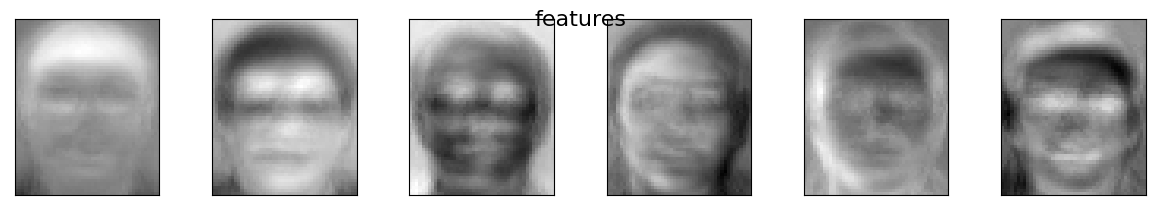

In [15]:
n_col = 6
n_row = 1
n_components = n_col * n_row
estimator =  naive_PCA(n_components= n_components)
# 调用MY_PCA提取特征
W = estimator.fit_transform(data_set)
plot_gallery("features", estimator.components_,n_col,n_row)
plt.show()

#### Ⅲ、分块矩阵与PCA（2分）
我们在课上描述了对图像进行分块，实际上，有一种叫作[Modular PCA](https://www.jsjkx.com/CN/article/openArticlePDF.jsp?id=11955)（分块PCA）的方法，通过将图片分割成许多相同的子矩阵，作为新的样本集，对这些样本集求出一个特征向量矩阵，然后将每个子块矩阵与该特征向量矩阵做矩阵乘法投影到特征空间中，再把所有的子块合并起来，就得到了整张图片的特征空间表示，这样的Modular PCA可以更好的捕捉局部特征，避免因为光线不均匀导致的不重要特征误提取，其特征向量矩阵相比全局PCA而言更加突出了局部特征。同时这也是一种图像压缩技巧，通过将每个投影后的子块通过特征向量矩阵投影回原空间再拼接，就得到了复原后的图像，可以通过Modular PCA和PCA比较这两种方法复原的效果。

In [16]:
def get_window_by_step_stride(data, step1,step2,stride1,stride2):
    '''
    data: n_samples * n_row * n_column
    step1: 沿图片竖直方向的块长度
    step2: 沿图片水平方向的块长度
    stride1: 沿图片竖直方向相邻块间隔
    stride2: 沿图片水平方向相邻块间隔 
    return: n_samples * row_block_num * column_block_num * row_per_block * column_per_block
    '''
    shape = data.shape
    img_shape = shape[1:]
    #由于padding必须为0，因此分块矩阵应恰好覆盖全部数据
    assert (img_shape[0] - step1)%stride1 == 0 and (img_shape[1] - step2)%stride2 == 0
    #TODO
    row_block_num = (img_shape[0] - step1) // stride1 + 1
    column_block_num = (img_shape[1] - step2) // stride2 + 1
    return np.lib.stride_tricks.as_strided(
        data, 
        (shape[0], row_block_num, column_block_num, step1, step2),
        (shape[1]*shape[2], stride1 * shape[2], stride2, shape[2], 1)
    )

<font color=red>你需要使用`np.lib.stride_tricks.as_strided`实现上述函数，使得其效果满足下面的assert条件，也即它能够以设定的步长将样本中的每张图片划分成一定数量具有设定的块大小的分块。（2分）


如果你觉得上述实现有困难，你可以直接使用下面的for循环来提取出每一个分块矩阵，然后将所有矩阵堆叠，使得其与第一种方法输出保持一致。（1分）</font>

（注意：本题给分方式：如果以第一种方式完成，你会获得额外的1分，只需要实现上述一种方式即可，上限2分）

In [17]:
#for test
stride1 = 18
stride2 = 23
step1 = 20
step2 = 23
block_imgs = get_window_by_step_stride(data_img,stride1 = 18,stride2 = 23,step1 = 20,step2 = 23)
for i in range(block_imgs.shape[1]):
    for j in range(block_imgs.shape[2]):
        pic = data_img[:,i * stride1:i * stride1 + step1,j * stride2:j * stride2 + step2]
        assert (pic == block_imgs[:,i,j]).all()

下面展现出Modular PCA的优势，在时间、空间和复原效果上都要好于PCA。（阅读即可）

压缩后空间： (400, 128) (128, 2576)
压缩所用时间： 0.2837531566619873 秒
压缩后空间： (2400, 128) (128, 460)
压缩所用时间： 0.2734522819519043 秒


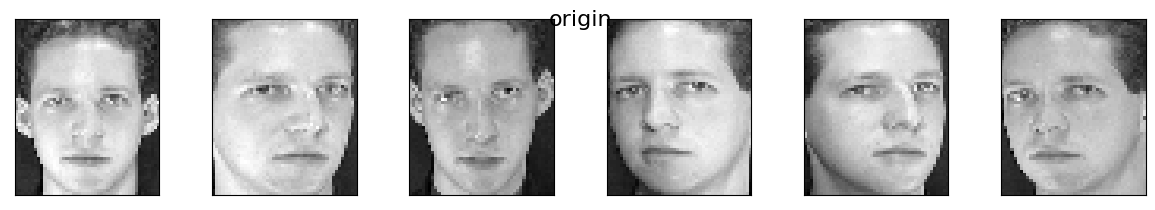

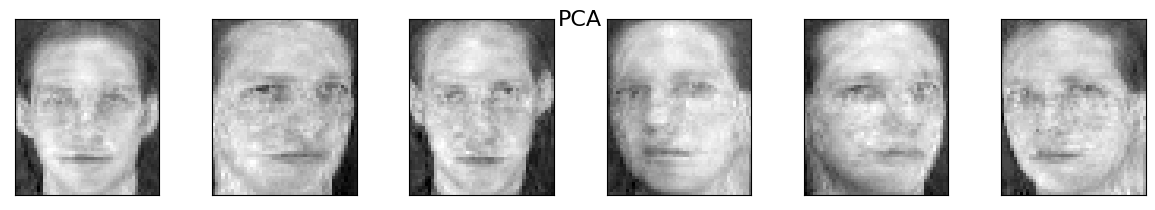

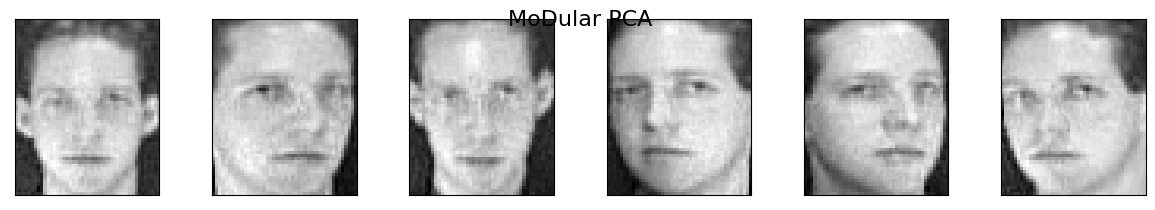

In [18]:
#1.原图
plot_gallery('origin',data_img[:6],n_col = 6,n_row = 1,is_feature= False)

#2.对原图直接使用PCA
start = time.time()
pca = naive_PCA(n_components=128)
w = pca.fit_transform(data_set)
recoverd  = (w @ pca.components_ + pca.mean).reshape((-1,*img_shape))
end = time.time()
print("压缩后空间：",w.shape,pca.components_.shape)
print("压缩所用时间：",end - start,"秒")
plot_gallery('PCA',recoverd[:6],n_col = 6,n_row = 1,is_feature= False)

#3.对原图分块后再使用PCA
start = time.time()
block_imgs = get_window_by_step_stride(data_img,stride1 = 18,stride2 = 23,step1 = 20,step2 = 23)
new_data_set = block_imgs.reshape(-1,step1*step2)
pca = naive_PCA(n_components=128)
w = pca.fit_transform(new_data_set)
recoverd = (w @ pca.components_ + pca.mean).reshape(*block_imgs.shape)
recoved_img = np.zeros_like(data_img)
    #将复原后的分块填回图像中
for i in range(block_imgs.shape[1]):
    for j in range(block_imgs.shape[2]):
        recoved_img[:,i*stride1:i*stride1+step1,j*stride2:j*stride2+step2] = recoverd[:,i,j,:,:]
end = time.time()
print("压缩后空间：",w.shape,pca.components_.shape)
print("压缩所用时间：",end - start,"秒")
plot_gallery('MoDular PCA',recoved_img[:6],n_col = 6,n_row = 1,is_feature= False)